# Percona XtraDB Cluster 8.0  Operator vs Amazon Aurora

Also I will use 3-nodes  Percona XtraDB Cluster setup.

The configs, scripts and raw results are available on our github: https://github.com/Percona-Lab-results/Aurora-May2020

Workload is “IO bound”, that is data (about 100GB) 


In [27]:
library(IRdisplay)

display_html(
'<script>  
code_show=false; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [3]:
library (RCurl)
library(ggplot2)
library(repr)

In [2]:
loadd  <- function (url,cluster,tables) {
    threads <- c(1,2,4,8,16,64,128,256)
    res = data.frame()
    for (val in threads) {
        #Percona-Lab-results/Aurora-May2020/tree/master/res-tpcc-Aurora-3nodes-5tables-db.r5.xlarge-1
        #Percona-Lab-results/Aurora-May2020/tree/master/res-tpcc-PXC-Operator-3nodes-10tables-r5.xlarge-try2-1
        urldown=paste0("https://raw.githubusercontent.com/Percona-Lab-results/Aurora-May2020/master/",url,"/res_thr",val,".txt")
        download <- getURL(urldown)
        
        dl<-strsplit(download, split='\n')
        data <- read.csv (text = grep("^[0-9]", dl[[1]], value = TRUE), header=F)
        
        data$threads=val
        data$tables=tables
        data$cluster=cluster
        if(nrow(res)<1){
            res<-data
        }else{
            res<-rbind(data,res)
        }
    }
    
    return(res)
}



In [28]:
r1 <- loadd("res-tpcc-Aurora-3nodes-db.r5.xlarge-1","Aurora",10)
r2 <- loadd("res-tpcc-PXC-Operator-3nodes-10tables-r5.xlarge-try2-1","PXC",10)
r3 <- loadd("res-tpcc-RDS-3nodes-10tables-r5.xlarge-1","RDS",10)
r4 <- loadd("res-tpcc-Aurora-3nodes-5tables-db.r5.xlarge-1","Aurora",5)
r5 <- loadd("res-tpcc-PXC-Operator-3nodes-5tables-r5.xlarge-1","PXC",5)
r6 <- loadd("res-tpcc-RDS-3nodes-5tables-r5.xlarge-1","RDS",5)
#r3 <- loadd("PXC8","3")
#r4 <- loadd("PXC8","5")
#results<-rbind(r1,r2,r3,r4)
results<-rbind(r1,r2,r3,r4,r5,r6)


In [12]:
theme_set(theme_light())
theme_replace(axis.text.x=element_text(size = rel(2)))
theme_replace(axis.text.y=element_text(size = rel(2)))
theme_replace(axis.title.x=element_text(size = rel(1.5)))
theme_replace(axis.title.y=element_text(size = rel(1.5), angle = 90))
theme_replace(legend.title=element_text(size = rel(1.5)))
theme_replace(legend.text=element_text(size = rel(1.5)))
theme_replace(plot.title=element_text(size = rel(2)))
theme_replace(strip.text.x=element_text(size = rel(2)))
theme_replace(strip.text.y=element_text(size = rel(2)))



## Results
Let’s review the results I’ve got.

### 100GB dataset
First, let’s take a look at how performance changes when we increase user threads from 1 to 256 for 100GB dataset.


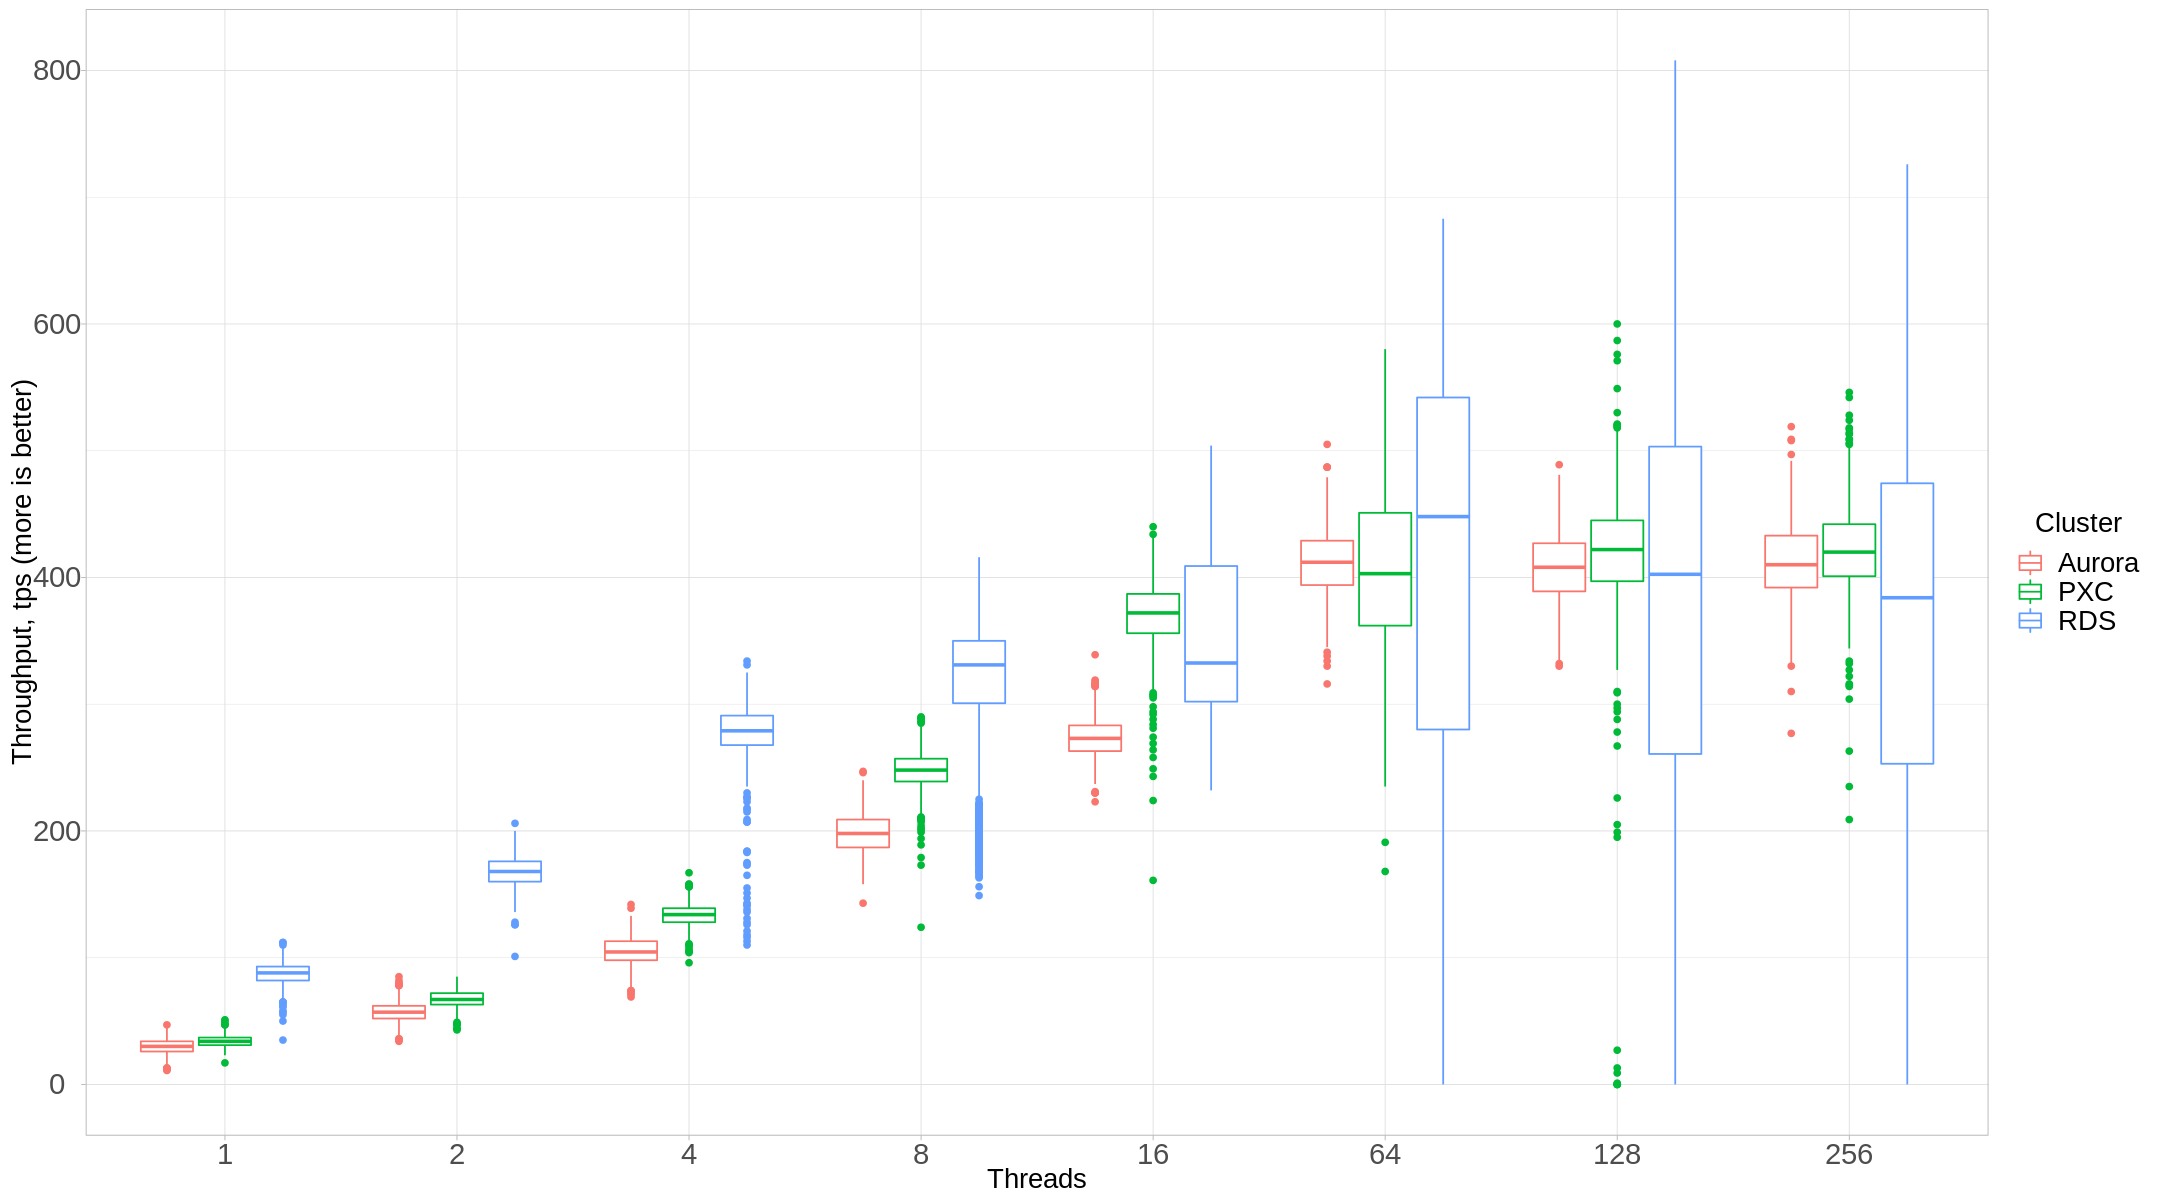

In [29]:
m <- ggplot(data = subset(results,(V1>900) & (tables==10)), 
            aes(x=as.factor(threads), y=V3, color=as.factor(cluster)))

options(repr.plot.width=18, repr.plot.height=10)


m + geom_boxplot()+
    ylab("Throughput, tps (more is better)")+
    xlab("Threads")+
    scale_colour_discrete(name="Cluster")


### 50GB dataset
Now the results for the half of 100GB - 50GB, when more data fits into memory



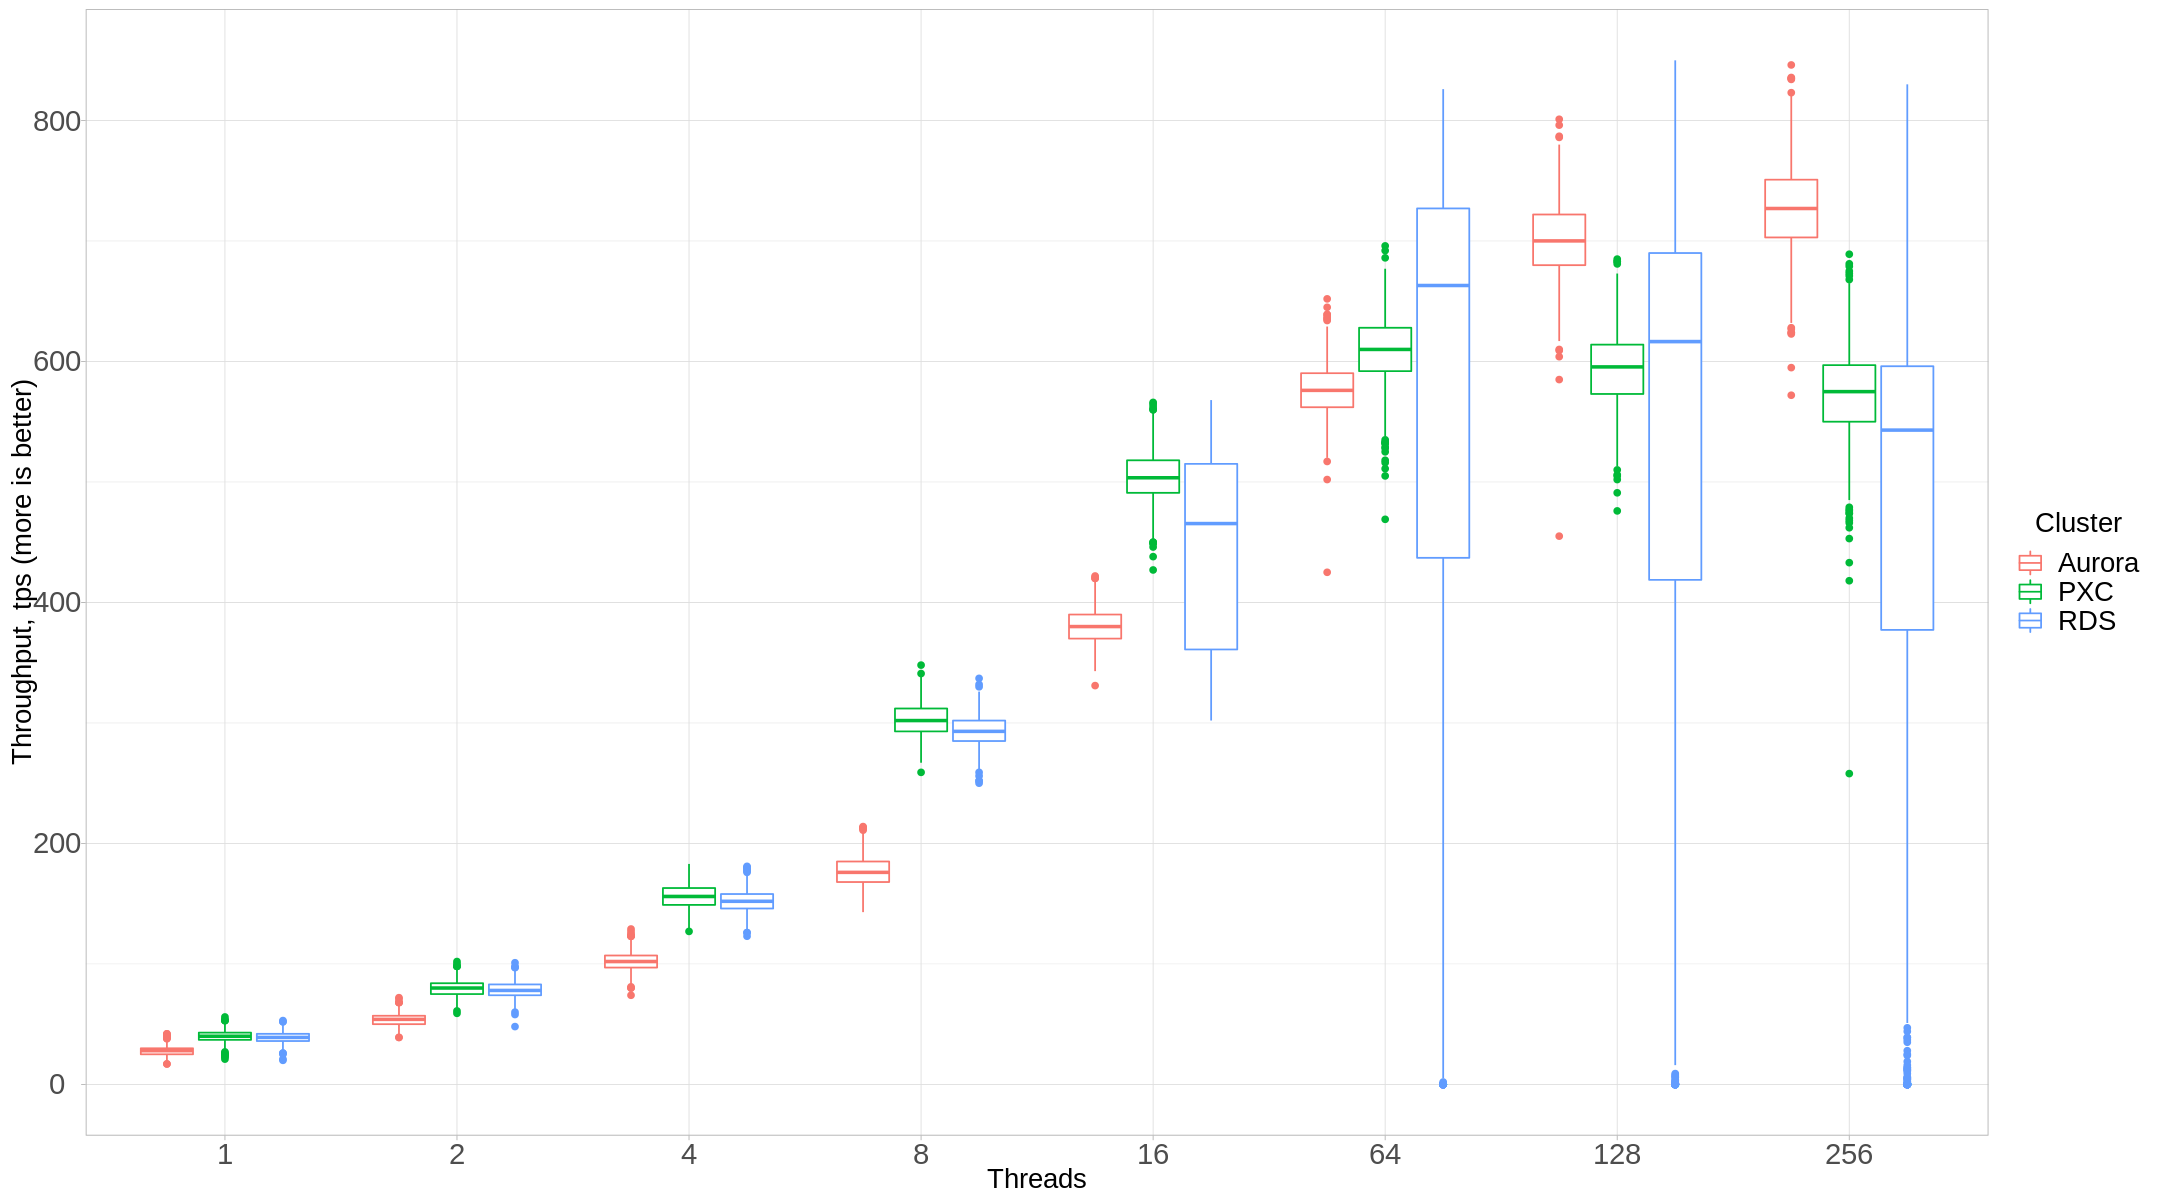

In [30]:
m <- ggplot(data = subset(results,(V1>900) & (tables==5)), 
            aes(x=as.factor(threads), y=V3, color=as.factor(cluster)))

options(repr.plot.width=18, repr.plot.height=10)


m + geom_boxplot()+
    ylab("Throughput, tps (more is better)")+
    xlab("Threads")+
    scale_colour_discrete(name="Cluster")